# 4.10 Coding Etiquette and Excel Reporting

Importing data set from 4.9

In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Path
path = r'C:\Users\steve\OneDrive\Documents\Instacart Basket Analyis'

In [3]:
customer = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'customer.pkl'))

Considering any security implications that might exist in data

In [5]:
customer.dtypes

order_id                     int64
user_id                      int64
order_number                 int64
order_dow                    int64
order_hour_of_day            int64
days_since_prior_order     float64
product_id                 float64
add_to_cart_order          float64
reordered                  float64
product_name                object
aisle_id                     int64
department_id                int64
prices                     float64
_merge                    category
price_range                 object
price_range_loc             object
Busiest_day                 object
Busiest_days                object
busiest_period_of_day       object
max_order                    int64
loyalty_flag                object
mean_price                 float64
spender_type                object
frequent_shopper            object
mean_days_bw_orders        float64
First Name                  object
Last Name                   object
Gender                      object
STATE               

In [6]:
# Rename order dow to orders day of week
customer.rename(columns = {'order_dow' : 'orders_day_of_week'}, inplace = True)

In [8]:
#dropping columns not needed and customer names for security reason
instacart = customer.drop(columns = ['_merge', 'Busiest_day', 'price_range', 'First Name', 'Last Name'])

In [9]:
instacart.head()

order_id  user_id  order_number  orders_day_of_week  order_hour_of_day  \
0   2539329        1             1                   2                  8   
1   2398795        1             2                   3                  7   
2    473747        1             3                   3                 12   
3   2254736        1             4                   4                  7   
4    431534        1             5                   4                 15   

   days_since_prior_order  product_id  add_to_cart_order  reordered  \
0                     0.0       196.0                1.0        0.0   
1                    15.0       196.0                1.0        1.0   
2                    21.0       196.0                1.0        1.0   
3                    29.0       196.0                1.0        1.0   
4                    28.0       196.0                1.0        1.0   

  product_name  ...  spender_type  frequent_shopper  mean_days_bw_orders  \
0         Soda  ...   low_spender  Regular_customer            18.542373   
1         Soda  ...   low_spender  Regular_customer            18.542373   
2         Soda  ...   low_spender  Regular_customer            18.542373   
3         Soda  ...   low_spender  Regular_customer            18.542373   
4         Soda  ...   low_spender  Regular_customer            18.542373   

   Gender    STATE Age  date_joined n_dependants  fam_status income  
0  Female  Alabama  31    2/17/2019            3     married  40423  
1  Female  Alabama  31    2/17/2019            3     married  40423  
2  Female  Alabama  31    2/17/2019            3     married  40423  
3  Female  Alabama  31    2/17/2019            3     married  40423  
4  Female  Alabama  31    2/17/2019            3     married  40423  

[5 rows x 29 columns]

Creating regional segmentation of the data. Region colunmn based on State column

In [10]:
regionNE = ['Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'New Jersey', 'New York', 'Pennsylvania', 'Rhode Island', 'Vermont']

In [11]:
regionSE = ['Alabama', 'Arkansas', 'Delaware', 'Florida', 'Georgia', 'Kentucky', 'Louisiana', 'Maryland', 'Mississippi', 'North Carolina', 'South Carolina', 'Tennessee', 'Virginia', 'West Virginia', 'District of Columbia'] 

In [12]:
regionMW = ['Illinois', 'Indiana', 'Iowa', 'Kansas', 'Michigan', 'Minnesota', 'Missouri', 'Ohio', 'North Dakota', 'Nebraska', 'South Dakota', 'Wisconsin']

In [13]:
regionSW = ['Arizona', 'New Mexico', 'Oklahoma', 'Texas']

In [14]:
regionW = ['Alaska', 'California', 'Colorado', 'Hawaii', 'Idaho', 'Nevada', 'Montana', 'Oregon', 'Utah', 'Washington', 'Wyoming']

In [16]:
instacart.loc[instacart['STATE'].isin (regionNE), 'region'] = 'Northeast'

In [17]:
instacart.loc[instacart['STATE'].isin (regionSE), 'region'] = 'Southeast'

In [18]:
instacart.loc[instacart['STATE'].isin (regionMW), 'region'] = 'Midwest'

In [19]:
instacart.loc[instacart['STATE'].isin (regionSW), 'region'] = 'Southwest'

In [20]:
instacart.loc[instacart['STATE'].isin (regionW), 'region'] = 'West'

In [21]:
instacart.head()

order_id  user_id  order_number  orders_day_of_week  order_hour_of_day  \
0   2539329        1             1                   2                  8   
1   2398795        1             2                   3                  7   
2    473747        1             3                   3                 12   
3   2254736        1             4                   4                  7   
4    431534        1             5                   4                 15   

   days_since_prior_order  product_id  add_to_cart_order  reordered  \
0                     0.0       196.0                1.0        0.0   
1                    15.0       196.0                1.0        1.0   
2                    21.0       196.0                1.0        1.0   
3                    29.0       196.0                1.0        1.0   
4                    28.0       196.0                1.0        1.0   

  product_name  ...  frequent_shopper  mean_days_bw_orders  Gender    STATE  \
0         Soda  ...  Regular_customer            18.542373  Female  Alabama   
1         Soda  ...  Regular_customer            18.542373  Female  Alabama   
2         Soda  ...  Regular_customer            18.542373  Female  Alabama   
3         Soda  ...  Regular_customer            18.542373  Female  Alabama   
4         Soda  ...  Regular_customer            18.542373  Female  Alabama   

  Age date_joined  n_dependants fam_status  income     region  
0  31   2/17/2019             3    married   40423  Southeast  
1  31   2/17/2019             3    married   40423  Southeast  
2  31   2/17/2019             3    married   40423  Southeast  
3  31   2/17/2019             3    married   40423  Southeast  
4  31   2/17/2019             3    married   40423  Southeast  

[5 rows x 30 columns]

In [22]:
#To determine whether there's a difference in spending habits between the different U.S regions

crosstab = pd.crosstab(instacart['region'], instacart['spender_type'], dropna = False)

In [23]:
crosstab

spender_type  high_spender  low_spender
region                                 
Midwest               4713       220449
Northeast             3763       174732
Southeast             5727       281894
Southwest             2069        72355
West                  5071       222804

There is no spending habit difference between regions. Ratio of high spender compared to low spender is same throughout all regions.

Creating exclusion flag for low activity customters. 

In [26]:
instacart.loc[instacart['max_order'] < 5, 'exclusion flag'] = 'low-activity'
instacart.loc[instacart['max_order'] >= 5, 'exclusion flag'] = 'high-activity'

In [27]:
instacart['exclusion flag'].value_counts(dropna = False)

high-activity    949521
low-activity      44056
Name: exclusion flag, dtype: int64

In [28]:
instacart_2 = instacart.drop(instacart[instacart.max_order < 5].index)

In [29]:
instacart_2.shape

(949521, 31)

Creating a profiling variable based on age, income, certain goods in department_id column and number of dependants. 

List of social generations based on wikipedia
A) Gen Z: 18-25 B) Millnnials/Gen Y: 26-41 C) Gen X: 42-57 D) Baby Boomers: 58-76 E) Silent Generation: 77-81

In [31]:
instacart.loc[instacart['Age'] <= 25, 'age_flag'] = 'Gen Z'

In [34]:
instacart.loc[(instacart['Age'] <= 41) & (instacart['Age'] >= 26), 'age_flag'] = 'Millennials'

In [35]:
instacart.loc[(instacart['Age'] <= 57) & (instacart['Age'] >= 42), 'age_flag'] = 'Gen X'

In [36]:
instacart.loc[(instacart['Age'] <= 76) & (instacart['Age'] >= 58), 'age_flag'] = 'Baby Boomers'

In [37]:
instacart.loc[instacart['Age'] >= 77, 'age_flag'] = 'Silent Gen'

In [38]:
instacart['age_flag'].value_counts(dropna = False)

Baby Boomers    292967
Gen X           246897
Millennials     245974
Gen Z           130055
Silent Gen       77684
Name: age_flag, dtype: int64

List of income class based on US NEWS. A) Low: 32048 or less B) Lower Middle: 32049-53413 C) Middle: 53414-106827 D) Upper Middle: 106828-373894 E) Rich: 373895 or higher 

In [40]:
instacart.loc[instacart['income'] <= 32048, 'income_flag'] = 'Low Class'

In [41]:
instacart.loc[(instacart['income'] >= 32049) & (instacart['income'] <= 53413), 'income_flag'] = 'Lower Middle Class'

In [42]:
instacart.loc[(instacart['income'] >= 53414) & (instacart['income'] <= 106827), 'income_flag'] = 'Middle Class'

In [43]:
instacart.loc[(instacart['income'] >= 106828) & (instacart['income'] <= 373894 ), 'income_flag'] = 'Upper Middle Class'

In [44]:
instacart.loc[instacart['income'] >= 373895, 'income_flag'] = 'Wealthy Class'

In [45]:
instacart['income_flag'].value_counts(dropna = False)

Middle Class          454309
Upper Middle Class    398030
Lower Middle Class    123560
Low Class              15818
Wealthy Class           1860
Name: income_flag, dtype: int64

Identifying Departments

In [48]:
dept= pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'))

In [49]:
dept.head()

Unnamed: 0 department
0           1     frozen
1           2      other
2           3     bakery
3           4    produce
4           5    alcohol

In [50]:
# Rename to match department_id
dept.rename(columns = {'Unnamed: 0':'department_id'}, inplace = True)

In [51]:
dept.head()

department_id department
0              1     frozen
1              2      other
2              3     bakery
3              4    produce
4              5    alcohol

In [52]:
#combine with instacart data set
instacart_merge = instacart.merge(dept, on = 'department_id')

In [53]:
instacart_merge.head()

order_id  user_id  order_number  orders_day_of_week  order_hour_of_day  \
0   2539329        1             1                   2                  8   
1   2398795        1             2                   3                  7   
2    473747        1             3                   3                 12   
3   2254736        1             4                   4                  7   
4    431534        1             5                   4                 15   

   days_since_prior_order  product_id  add_to_cart_order  reordered  \
0                     0.0       196.0                1.0        0.0   
1                    15.0       196.0                1.0        1.0   
2                    21.0       196.0                1.0        1.0   
3                    29.0       196.0                1.0        1.0   
4                    28.0       196.0                1.0        1.0   

  product_name  ...  Age  date_joined  n_dependants fam_status income  \
0         Soda  ...   31    2/17/2019             3    married  40423   
1         Soda  ...   31    2/17/2019             3    married  40423   
2         Soda  ...   31    2/17/2019             3    married  40423   
3         Soda  ...   31    2/17/2019             3    married  40423   
4         Soda  ...   31    2/17/2019             3    married  40423   

      region  exclusion flag     age_flag         income_flag department  
0  Southeast   high-activity  Millennials  Lower Middle Class  beverages  
1  Southeast   high-activity  Millennials  Lower Middle Class  beverages  
2  Southeast   high-activity  Millennials  Lower Middle Class  beverages  
3  Southeast   high-activity  Millennials  Lower Middle Class  beverages  
4  Southeast   high-activity  Millennials  Lower Middle Class  beverages  

[5 rows x 34 columns]

In [54]:
instacart_merge['department'].value_counts(dropna = False)

produce            286350
dairy eggs         166294
snacks              92091
beverages           83692
frozen              67492
pantry              57183
bakery              36723
deli                32824
canned goods        31325
dry goods pasta     25583
household           23376
breakfast           22500
meat seafood        21253
personal care       14005
babies              12325
international        8173
alcohol              4535
pets                 3459
missing              2213
bulk                 1097
other                1084
Name: department, dtype: int64

In [55]:
# Create a data dictionary

dept = zip(instacart_merge['department_id'], instacart_merge['department'])

In [56]:
depts_dict = dict(dept)

In [57]:
depts_dict

{7: 'beverages',
 16: 'dairy eggs',
 19: 'snacks',
 17: 'household',
 4: 'produce',
 14: 'breakfast',
 13: 'pantry',
 3: 'bakery',
 1: 'frozen',
 9: 'dry goods pasta',
 15: 'canned goods',
 11: 'personal care',
 12: 'meat seafood',
 20: 'deli',
 6: 'international',
 5: 'alcohol',
 21: 'missing',
 8: 'pets',
 18: 'babies',
 2: 'other',
 10: 'bulk'}

In [58]:
# Number of dependant and department 18 which is for babies have strong correlation

A) Single Adult: no dependant B) Family with a baby. If they order from department 18 C) Family; have dependant but their order does not include department 18

In [59]:
instacart_merge.loc[instacart_merge['n_dependants'] <= 0, 'family_flag'] = 'single adult'

In [60]:
instacart_merge.loc[(instacart_merge['department_id'] == 18) & (instacart_merge['n_dependants'] > 0), 'family_flag'] = 'family with baby'

In [61]:
instacart_merge.loc[(instacart_merge['department_id'] !=18) & (instacart_merge['n_dependants'] > 0), 'family_flag'] = 'family'

In [62]:
instacart_merge['family_flag'].value_counts(dropna = False)

family              746499
single adult        238647
family with baby      8431
Name: family_flag, dtype: int64

In [63]:
instacart_merge.head()

order_id  user_id  order_number  orders_day_of_week  order_hour_of_day  \
0   2539329        1             1                   2                  8   
1   2398795        1             2                   3                  7   
2    473747        1             3                   3                 12   
3   2254736        1             4                   4                  7   
4    431534        1             5                   4                 15   

   days_since_prior_order  product_id  add_to_cart_order  reordered  \
0                     0.0       196.0                1.0        0.0   
1                    15.0       196.0                1.0        1.0   
2                    21.0       196.0                1.0        1.0   
3                    29.0       196.0                1.0        1.0   
4                    28.0       196.0                1.0        1.0   

  product_name  ...  date_joined  n_dependants  fam_status income     region  \
0         Soda  ...    2/17/2019             3     married  40423  Southeast   
1         Soda  ...    2/17/2019             3     married  40423  Southeast   
2         Soda  ...    2/17/2019             3     married  40423  Southeast   
3         Soda  ...    2/17/2019             3     married  40423  Southeast   
4         Soda  ...    2/17/2019             3     married  40423  Southeast   

  exclusion flag     age_flag         income_flag  department family_flag  
0  high-activity  Millennials  Lower Middle Class   beverages      family  
1  high-activity  Millennials  Lower Middle Class   beverages      family  
2  high-activity  Millennials  Lower Middle Class   beverages      family  
3  high-activity  Millennials  Lower Middle Class   beverages      family  
4  high-activity  Millennials  Lower Middle Class   beverages      family  

[5 rows x 35 columns]

Visualization

<AxesSubplot:>

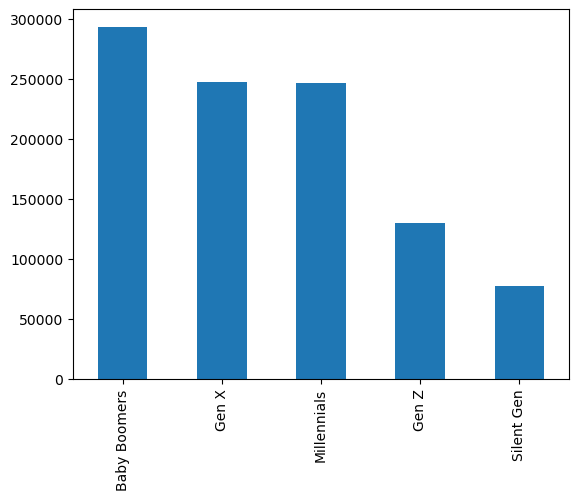

In [65]:
# Create bar chart for age_flag 

instacart_merge['age_flag'].value_counts().plot.bar()

<AxesSubplot:>

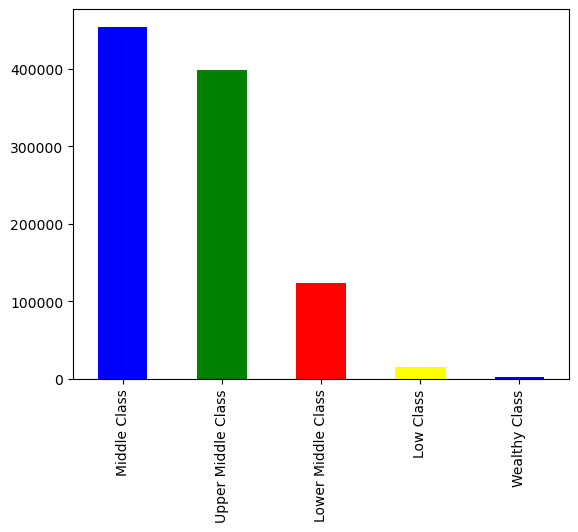

In [66]:
# Create bar chart for income_flag

instacart_merge['income_flag'].value_counts().plot.bar(color = ['blue', 'green', 'red', 'yellow'])

<AxesSubplot:>

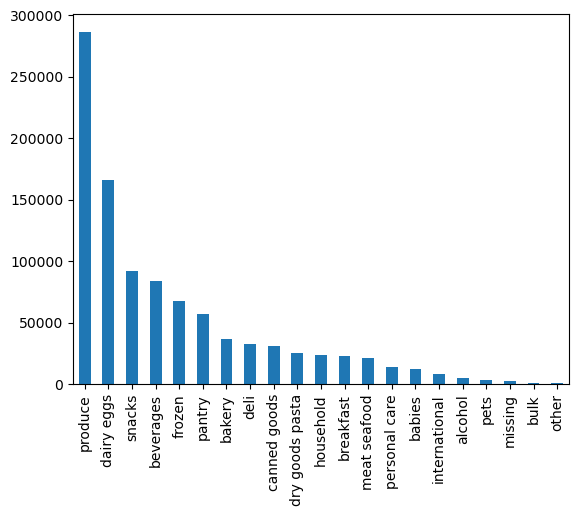

In [67]:
# create chart for deparment

instacart_merge['department'].value_counts().plot.bar()

<AxesSubplot:>

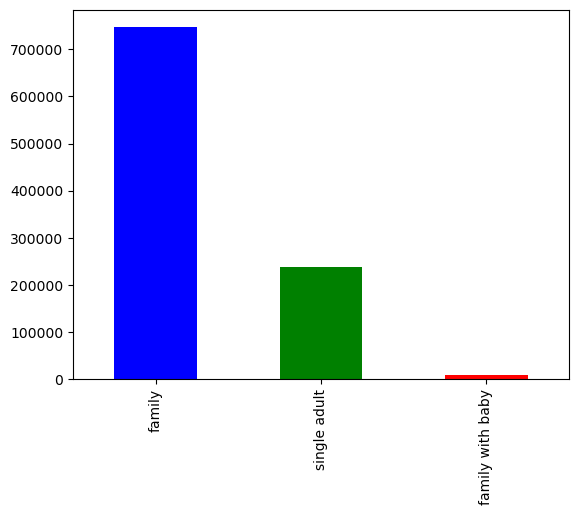

In [69]:
# create chart for family flag
instacart_merge['family_flag'].value_counts().plot.bar(color = ['blue', 'green', 'red'])

In [70]:
instacart_merge.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'instacart_merge.pkl'))
instacart_2.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'instacart_2.pkl'))

In [71]:
instacart_merge.head()

order_id  user_id  order_number  orders_day_of_week  order_hour_of_day  \
0   2539329        1             1                   2                  8   
1   2398795        1             2                   3                  7   
2    473747        1             3                   3                 12   
3   2254736        1             4                   4                  7   
4    431534        1             5                   4                 15   

   days_since_prior_order  product_id  add_to_cart_order  reordered  \
0                     0.0       196.0                1.0        0.0   
1                    15.0       196.0                1.0        1.0   
2                    21.0       196.0                1.0        1.0   
3                    29.0       196.0                1.0        1.0   
4                    28.0       196.0                1.0        1.0   

  product_name  ...  date_joined  n_dependants  fam_status income     region  \
0         Soda  ...    2/17/2019             3     married  40423  Southeast   
1         Soda  ...    2/17/2019             3     married  40423  Southeast   
2         Soda  ...    2/17/2019             3     married  40423  Southeast   
3         Soda  ...    2/17/2019             3     married  40423  Southeast   
4         Soda  ...    2/17/2019             3     married  40423  Southeast   

  exclusion flag     age_flag         income_flag  department family_flag  
0  high-activity  Millennials  Lower Middle Class   beverages      family  
1  high-activity  Millennials  Lower Middle Class   beverages      family  
2  high-activity  Millennials  Lower Middle Class   beverages      family  
3  high-activity  Millennials  Lower Middle Class   beverages      family  
4  high-activity  Millennials  Lower Middle Class   beverages      family  

[5 rows x 35 columns]

Aggregate the max, mean and min on customer profile level for usage frequency and expenditure

In [72]:
#to see which day of the week 
instacart_merge.loc[instacart_merge['orders_day_of_week'] == 0, 'day_of_week'] = 'saturday'

In [73]:
instacart_merge.loc[instacart_merge['orders_day_of_week'] == 1, 'day_of_week'] = 'sunday'

In [74]:
instacart_merge.loc[instacart_merge['orders_day_of_week'] == 2, 'day_of_week'] = 'monday'

In [75]:
instacart_merge.loc[instacart_merge['orders_day_of_week'] == 3, 'day_of_week'] = 'tuesday'

In [76]:
instacart_merge.loc[instacart_merge['orders_day_of_week'] == 4, 'day_of_week'] = 'wednesday'

In [77]:
instacart_merge.loc[instacart_merge['orders_day_of_week'] == 5, 'day_of_week'] = 'thursday'

In [78]:
instacart_merge.loc[instacart_merge['orders_day_of_week'] == 6, 'day_of_week'] = 'friday'

<AxesSubplot:>

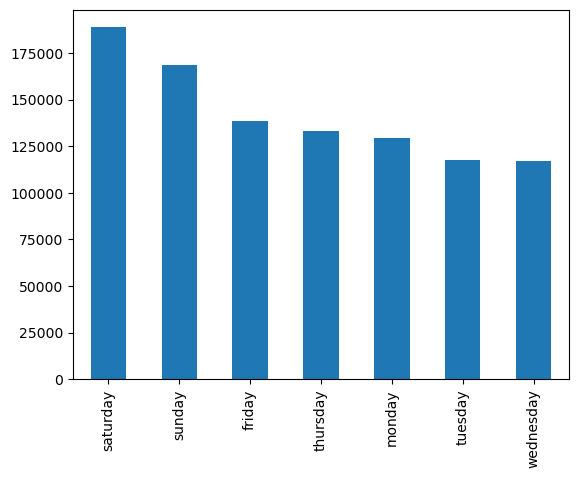

In [79]:
instacart_merge['day_of_week'].value_counts().plot.bar()

Usage Frequency

In [80]:
# Age Profile Usage Frequency Aggregation

instacart_merge.groupby('age_flag').agg({'days_since_prior_order':['mean', 'min', 'max']})

days_since_prior_order           
                               mean  min   max
age_flag                                      
Baby Boomers              10.229388  0.0  30.0
Gen X                     10.770512  0.0  30.0
Gen Z                     10.116651  0.0  30.0
Millennials               10.146548  0.0  30.0
Silent Gen                10.632138  0.0  30.0

In [81]:
# Income Profile Usage Frequency Aggregation

instacart_merge.groupby('income_flag').agg({'days_since_prior_order':['mean', 'min', 'max']})

days_since_prior_order           
                                     mean  min   max
income_flag                                         
Low Class                       11.260147  0.0  30.0
Lower Middle Class              10.431685  0.0  30.0
Middle Class                    10.320879  0.0  30.0
Upper Middle Class              10.337427  0.0  30.0
Wealthy Class                   12.370430  0.0  30.0

In [82]:
# Family Status Profile Usage Frequency Aggregration

instacart_merge.groupby('family_flag').agg({'days_since_prior_order':['mean', 'min', 'max']})

days_since_prior_order           
                                   mean  min   max
family_flag                                       
family                        10.255548  0.0  30.0
family with baby               9.729451  0.0  30.0
single adult                  10.709332  0.0  30.0

In [83]:
# Gender Status Profile Usage Frequency Aggregration

instacart_merge.groupby('Gender').agg({'days_since_prior_order':['mean', 'min', 'max']})

days_since_prior_order           
                         mean  min   max
Gender                                  
Female              10.273265  0.0  30.0
Male                10.446692  0.0  30.0

In [84]:
# Region Status Profile Usage Frequency Aggregration

instacart_merge.groupby('region').agg({'days_since_prior_order':['mean', 'min', 'max']})

days_since_prior_order           
                            mean  min   max
region                                     
Midwest                10.627881  0.0  30.0
Northeast              10.304905  0.0  30.0
Southeast              10.312940  0.0  30.0
Southwest              10.760427  0.0  30.0
West                   10.067423  0.0  30.0

Expenditure

In [85]:
# Age Profile Expenditure Frequency Aggregation

instacart_merge.groupby('age_flag').agg({'prices':['mean', 'min', 'max']})

prices           
                  mean  min   max
age_flag                         
Baby Boomers  7.784931  1.0  25.0
Gen X         7.778596  1.0  25.0
Gen Z         7.759295  1.0  25.0
Millennials   7.772582  1.0  25.0
Silent Gen    7.901232  1.0  25.0

In [86]:
# Income Profile Expenditure Frequency Aggregation

instacart_merge.groupby('income_flag').agg({'prices':['mean', 'min', 'max']})

prices           
                        mean  min   max
income_flag                            
Low Class           6.419642  1.0  25.0
Lower Middle Class  6.792726  1.0  25.0
Middle Class        7.926369  1.0  25.0
Upper Middle Class  7.989459  1.0  25.0
Wealthy Class       7.596850  1.0  24.8

In [87]:
# Family Status Profile Expenditure Frequency Aggregration

instacart_merge.groupby('family_flag').agg({'prices':['mean', 'min', 'max']})

prices           
                      mean  min   max
family_flag                          
family            7.777205  1.0  25.0
family with baby  7.674001  1.0  15.0
single adult      7.817620  1.0  25.0

In [88]:
# Gender Status Profile Expenditure Frequency Aggregration

instacart_merge.groupby('Gender').agg({'prices':['mean', 'min', 'max']})

prices           
            mean  min   max
Gender                     
Female  7.763410  1.0  25.0
Male    7.808611  1.0  25.0

In [89]:
# Region Status Profile Usage Frequency Aggregration

instacart_merge.groupby('region').agg({'prices':['mean', 'min', 'max']})

prices           
               mean  min   max
region                        
Midwest    7.776535  1.0  25.0
Northeast  7.787071  1.0  25.0
Southeast  7.789328  1.0  25.0
Southwest  7.807954  1.0  25.0
West       7.783302  1.0  25.0

Comparing customer profiles with regions and departments

In [90]:
pd.crosstab(instacart_merge['age_flag'], instacart_merge['region'], dropna = False)

region        Midwest  Northeast  Southeast  Southwest   West
age_flag                                                     
Baby Boomers    66857      55840      83584      21345  65341
Gen X           47326      43473      73605      19092  63401
Gen Z           30513      25498      40163       8562  25319
Millennials     59862      42201      70186      19639  54086
Silent Gen      20604      11483      20083       5786  19728

In [91]:
pd.crosstab(instacart_merge['income_flag'], instacart_merge['region'], dropna = False)

region              Midwest  Northeast  Southeast  Southwest    West
income_flag                                                         
Low Class              3847       2694       5042        866    3369
Lower Middle Class    25933      23840      37562       6711   29514
Middle Class         108771      81585     128335      33316  102302
Upper Middle Class    85876      69681     116682      33531   92260
Wealthy Class           735        695          0          0     430

In [92]:
pd.crosstab(instacart_merge['family_flag'], instacart_merge['region'], dropna = False)

region            Midwest  Northeast  Southeast  Southwest    West
family_flag                                                       
family             168218     127840     219235      60228  170978
family with baby     1969       1296       2890        436    1840
single adult        54975      49359      65496      13760   55057

In [93]:
pd.crosstab(instacart_merge['Gender'], instacart_merge['region'], dropna = False)

region  Midwest  Northeast  Southeast  Southwest    West
Gender                                                  
Female   110383      85380     144284      38573  117601
Male     114779      93115     143337      35851  110274

In [94]:
pd.crosstab(instacart_merge['age_flag'], instacart_merge['department'], dropna = False)

department    alcohol  babies  bakery  beverages  breakfast  bulk  \
age_flag                                                            
Baby Boomers     1271    2996   10618      24667       6341   260   
Gen X             720    3317    8905      21037       5937   271   
Gen Z             745    1559    4980      10882       2992   167   
Millennials      1558    3167    9136      20219       5544   295   
Silent Gen        241    1286    3084       6887       1686   104   

department    canned goods  dairy eggs  deli  dry goods pasta  ...  household  \
age_flag                                                       ...              
Baby Boomers          9182       49126  9251             7828  ...       6393   
Gen X                 8097       41442  8336             6628  ...       5789   
Gen Z                 4133       22083  4014             3265  ...       3508   
Millennials           7457       40549  8445             5890  ...       5660   
Silent Gen            2456       13094  2778             1972  ...       2026   

department    international  meat seafood  missing  other  pantry  \
age_flag                                                            
Baby Boomers           2539          6376      592    284   17001   
Gen X                  2084          5087      587    215   14374   
Gen Z                  1042          2733      348    232    7826   
Millennials            1977          5193      508    289   13725   
Silent Gen              531          1864      178     64    4257   

department    personal care  pets  produce  snacks  
age_flag                                            
Baby Boomers           4008   767    86914   26532  
Gen X                  3440   711    70483   23307  
Gen Z                  2161   600    35823   11940  
Millennials            3349  1037    71135   23753  
Silent Gen             1047   344    21995    6559  

[5 rows x 21 columns]

In [95]:
pd.crosstab(instacart_merge['income_flag'], instacart_merge['department'], dropna = False)

department          alcohol  babies  bakery  beverages  breakfast  bulk  \
income_flag                                                               
Low Class               128      82     574       2077        534     9   
Lower Middle Class      766    1470    4013      14049       3696   144   
Middle Class           2252    5973   17011      35948       9825   587   
Upper Middle Class     1386    4798   15018      31395       8405   357   
Wealthy Class             3       2     107        223         40     0   

department          canned goods  dairy eggs   deli  dry goods pasta  ...  \
income_flag                                                           ...   
Low Class                    308        2400    613              371  ...   
Lower Middle Class          2818       18898   4197             2614  ...   
Middle Class               14780       76488  14494            11806  ...   
Upper Middle Class         13363       68225  13487            10748  ...   
Wealthy Class                 56         283     33               44  ...   

department          household  international  meat seafood  missing  other  \
income_flag                                                                  
Low Class                 404            107           146       83      7   
Lower Middle Class       3414            674          1240      231    127   
Middle Class            11025           3916         10541      956    585   
Upper Middle Class       8439           3458          9297      942    365   
Wealthy Class              94             18            29        1      0   

department          pantry  personal care  pets  produce  snacks  
income_flag                                                       
Low Class              663            236    13     3170    2782  
Lower Middle Class    6212           1889   343    28596   20963  
Middle Class         26860           6741  1765   134167   36827  
Upper Middle Class   23338           5093  1331   120080   31341  
Wealthy Class          110             46     7      337     178  

[5 rows x 21 columns]

In [96]:
pd.crosstab(instacart_merge['family_flag'], instacart_merge['department'], dropna = False)

department        alcohol  babies  bakery  beverages  breakfast  bulk  \
family_flag                                                             
family               3596       0   27595      63529      17142   861   
family with baby        0    8431       0          0          0     0   
single adult          939    3894    9128      20163       5358   236   

department        canned goods  dairy eggs   deli  dry goods pasta  ...  \
family_flag                                                         ...   
family                   23678      126738  25656            18941  ...   
family with baby             0           0      0                0  ...   
single adult              7647       39556   7168             6642  ...   

department        household  international  meat seafood  missing  other  \
family_flag                                                                
family                17812           6227         15978     1562    868   
family with baby          0              0             0        0      0   
single adult           5564           1946          5275      651    216   

department        pantry  personal care  pets  produce  snacks  
family_flag                                                     
family             42958          10886  2531   216882   71290  
family with baby       0              0     0        0       0  
single adult       14225           3119   928    69468   20801  

[3 rows x 21 columns]

In [97]:
instacart_merge.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'instacart_merge.pkl'))
instacart_2.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'instacart_2.pkl'))

In [101]:
instacart_merge.groupby('loyalty_flag').agg({'days_since_prior_order':['mean', 'min', 'max']})

days_since_prior_order           
                                   mean  min   max
loyalty_flag                                      
Loyal customer                 5.699099  0.0  30.0
New customer                  14.748264  0.0  30.0
Regular customer              11.678844  0.0  30.0